In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the data
train = pd.read_csv('data/train.csv/train.csv')
test = pd.read_csv('data/test.csv/test.csv')
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
# removing resolution and description columns
train_df = train.drop(['Resolution', 'Descript', 'Address'], axis=1)
test_df = test.drop(['Address'], axis=1)
train_df.head()

,Dates,Category,DayOfWeek,PdDistrict,X,Y
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541


In [5]:
# converting to datetime
train_df['Dates'] = pd.to_datetime(train_df['Dates'])


In [6]:
# checking the basic statistics
train_df.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


0   2015-05-13 23:53:00
1   2015-05-13 23:53:00
2   2015-05-13 23:33:00
3   2015-05-13 23:30:00
4   2015-05-13 23:30:00
Name: Dates, dtype: datetime64[ns]


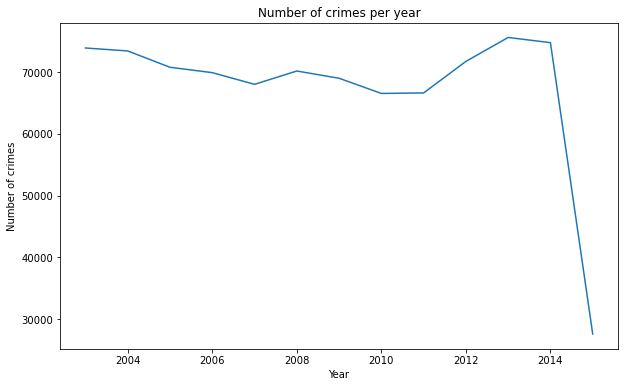

In [11]:
# creating a trend plot
date = train_df['Dates']
print(date.head())
plt.figure(figsize=(10, 6))
date.dt.year.value_counts().sort_index().plot()
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.title('Number of crimes per year')
plt.show()


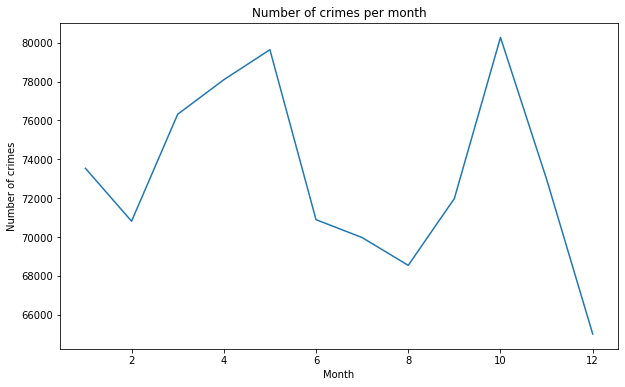

In [8]:
# creating a trend plot per month
plt.figure(figsize=(10, 6))
date.dt.month.value_counts().sort_index().plot()
plt.xlabel('Month')
plt.ylabel('Number of crimes')
plt.title('Number of crimes per month')
plt.show()


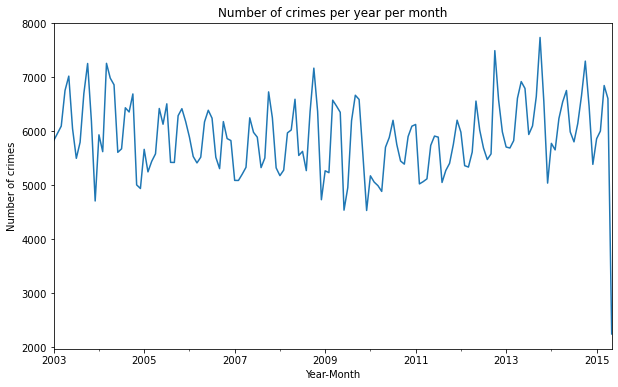

In [9]:
# creating a trend plot per month per year
plt.figure(figsize=(10, 6))
date.dt.to_period('M').value_counts().sort_index().plot()
plt.xlabel('Year-Month')
plt.ylabel('Number of crimes')
plt.title('Number of crimes per year per month')
plt.show()


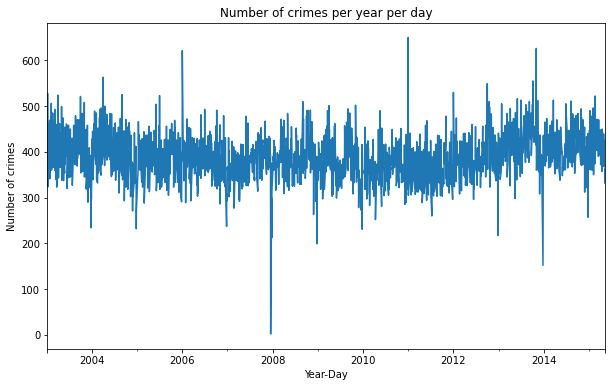

In [10]:
# creating a trend plot per day per year
plt.figure(figsize=(10, 6))
date.dt.to_period('D').value_counts().sort_index().plot()
plt.xlabel('Year-Day')
plt.ylabel('Number of crimes')
plt.title('Number of crimes per year per day')
plt.show()
